# K2 temperature Analysis

In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import glob
import richardsplot

In [2]:
fits_filename = glob.glob("/home/jackeline/Research/k2_pipeline/anc-eng/parameter-bundled/*.fits")
#fits_filename = glob.glob("/home/jackeline/Research/k2_pipeline/arp/*.fits")
#fits_filename = glob.glob("/home/jackeline/Research/k2_pipeline/bkg/*.fits")

#TH2LVAT
#TH2PMAT

#PEDDRV3T
print(fits_filename[0])
hdul = fits.open(fits_filename[0])
hdul.info()
L = np.shape(np.asarray(hdul[1].data))[0]

/home/jackeline/Research/k2_pipeline/anc-eng/parameter-bundled/ktwo_anc-eng_TH2LVAT.fits
Filename: /home/jackeline/Research/k2_pipeline/anc-eng/parameter-bundled/ktwo_anc-eng_TH2LVAT.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       9   ()      
  1                1 BinTableHDU     20   1284303R x 5C   [D, 23A, D, D, D]   


In [3]:
np.shape(hdul[1].data)

(1284303,)

In [4]:
tempvat = np.zeros((L,2))
for i in range(L):
    tempvat[i,0] = float(hdul[1].data[i][0])
    tempvat[i,1] = float(hdul[1].data[i][-1])

In [5]:
hdul.close()

print(fits_filename[1])
hdul = fits.open(fits_filename[1])
hdul.info()
L = np.shape(np.asarray(hdul[1].data))[0]
att = hdul[1].data
hdul.close()

attY = np.zeros((L,3))
for i in range(L):
    attY[i,0] = float(att[i][0])
    attY[i,1] = float(att[i][6])
    attY[i,2] = float(att[i][7])

In [6]:
print(fits_filename[2])
hdul = fits.open(fits_filename[2])
hdul.info()
L = np.shape(np.asarray(hdul[1].data))[0]
temp2 = hdul[1].data
hdul.close()

/home/jackeline/Research/k2_pipeline/anc-eng/parameter-bundled/ktwo_anc-eng_TH2PMAT.fits
Filename: /home/jackeline/Research/k2_pipeline/anc-eng/parameter-bundled/ktwo_anc-eng_TH2PMAT.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       9   ()      
  1                1 BinTableHDU     20   1284310R x 5C   [D, 23A, D, D, D]   


In [7]:
tempmat = np.zeros((L,2))
for i in range(L):
    tempmat[i,0] = float(temp2[i][0])
    tempmat[i,1] = float(temp2[i][-1])

### Plot engineering parameters

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


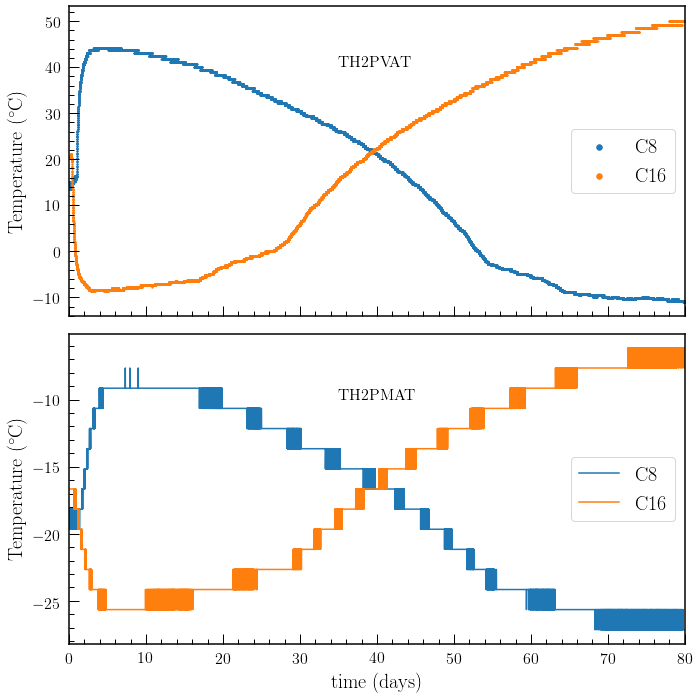

In [8]:
#f, [ax1,ax4,ax2, ax3] = plt.subplots(4,1, figsize = (15,15))
f, [ax1,ax4] = plt.subplots(2,1, figsize = (10,10), sharex = True)


c8start = np.where(tempvat[:,0] >= float(57390.0))[0][0]
c8stop = np.where(tempvat[:,0] >= float(57470.0))[0][0]
c16start = np.where(tempvat[:,0] >= float(58094.0))[0][0]
c16stop = np.where(tempvat[:,0] >= float(58174.0))[0][0]
ax1.scatter(tempvat[c8start:c8stop,0]-tempvat[c8start:c8stop,0][0],tempvat[c8start:c8stop,1], s = 1, label = "C8")
ax1.scatter(tempvat[c16start:c16stop,0]-tempvat[c16start:c16stop,0][0],tempvat[c16start:c16stop,1], s = 1, label = "C16")
ax1.set_ylabel(r"Temperature ($^\circ$C)",fontsize = 20)
lgnd1 = ax1.legend(fontsize = 20)
lgnd1.legendHandles[0]._sizes = [30]
lgnd1.legendHandles[1]._sizes = [30]
ax1.text(35,40, "TH2PVAT")



#c8start = np.where(attY[:,0] >= float(57390.0))[0][0]
#c8stop = np.where(attY[:,0] >= float(57470.0))[0][0]
#c16start = np.where(attY[:,0] >= float(58094.0))[0][0]
#c16stop = np.where(attY[:,0] >= float(58174.0))[0][0]

#ax2.plot(attY[c8start:c8stop,0]-attY[c8start:c8stop,0][0],attY[c8start:c8stop,1],lw = 0.8, label = "C8", alpha = 0.5)
#ax2.plot(attY[c16start:c16stop,0]-attY[c16start:c16stop,0][0],attY[c16start:c16stop,1], lw = 0.8, label = "C16", alpha = 0.5)

#ax2.set_ylabel(r"Attitude Y mean",fontsize = 16)
#ax2.set_ylim(attY[c8start:c8stop,1].min()/10, attY[c8start:c8stop,1].max()/10)


#ax3.plot(attY[c8start:c8stop,0]-attY[c8start:c8stop,0][0],attY[c8start:c8stop,2],lw = 0.8, label = "C8", alpha = 0.5)
#ax3.plot(attY[c16start:c16stop,0]-attY[c16start:c16stop,0][0],attY[c16start:c16stop,2], lw = 0.8, label = "C16", alpha = 0.5)
##ax3.set_ylabel(r"Attitude Y sigma",fontsize = 16)
#ax3.set_ylim(attY[c8start:c8stop,2].min(), attY[c8start:c8stop,2].max())


c8start = np.where(tempmat[:,0] >= float(57390.0))[0][0]
c8stop = np.where(tempmat[:,0] >= float(57470.0))[0][0]
c16start = np.where(tempmat[:,0] >= float(58094.0))[0][0]
c16stop = np.where(tempmat[:,0] >= float(58174.0))[0][0]

ax4.plot(tempmat[c8start:c8stop,0]-tempmat[c8start:c8stop,0][0],tempmat[c8start:c8stop,1],  label = "C8")
ax4.plot(tempmat[c16start:c16stop,0]-tempmat[c16start:c16stop,0][0],tempmat[c16start:c16stop,1],  label = "C16")
ax4.set_ylabel(r"Temperature ($^\circ$C)",fontsize = 20)
ax1.set_xlim(0,80)
lgnd2 = ax4.legend(fontsize = 20)
lgnd2.legendHandles[0]._sizes = [30]
lgnd2.legendHandles[1]._sizes = [30]
ax4.text(35,-10, "TH2PMAT")
ax4.set_xlabel("time (days)", fontsize = 20)
plt.tight_layout()
#plt.savefig("fig13_5.pdf", dpi = 200)
